In [1]:
import dlsfunctions as dls
import initialization_data as init
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time = init.get_log_time()
d = init.get_distance()

gamma = init.get_gamma()

mean = init.get_right_mean()

sigma = init.get_wide_sigma()

m = init.m
c = init.c
beta = init.beta

f = dls.generate_distribution(d, mean, sigma, c)
noise = np.random.normal(mean, sigma, 200)*1e7

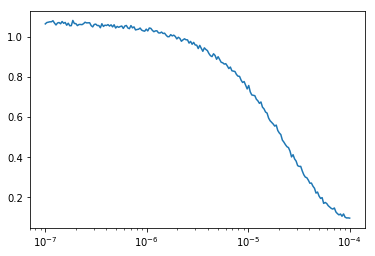

In [3]:
theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time) + noise
plt.semilogx(time, sim_data)

In [4]:
ndim = 21
nwalkers = 100
nsteps = 1000

start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.362, 0.371, 0.358, 0.381, 0.331, 0.36 , 0.348, 0.371, 0.356,
       0.357, 0.373, 0.38 , 0.386, 0.373, 0.375, 0.359, 0.335, 0.351,
       0.398, 0.385, 0.382, 0.351, 0.374, 0.359, 0.334, 0.368, 0.328,
       0.337, 0.336, 0.351, 0.367, 0.368, 0.368, 0.37 , 0.344, 0.343,
       0.387, 0.388, 0.37 , 0.356, 0.331, 0.375, 0.38 , 0.378, 0.381,
       0.352, 0.362, 0.364, 0.38 , 0.362, 0.335, 0.36 , 0.389, 0.339,
       0.32 , 0.378, 0.354, 0.362, 0.381, 0.341, 0.351, 0.34 , 0.391,
       0.329, 0.357, 0.369, 0.378, 0.393, 0.333, 0.384, 0.366, 0.364,
       0.338, 0.377, 0.355, 0.35 , 0.365, 0.347, 0.344, 0.333, 0.369,
       0.349, 0.403, 0.351, 0.364, 0.393, 0.393, 0.37 , 0.357, 0.374,
       0.36 , 0.395, 0.372, 0.381, 0.372, 0.344, 0.346, 0.365, 0.38 ,
       0.356])

In [5]:
chained_sampler = dls.chain(result, 800, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,1.416562e+07,7.449333e+06,4.042943e+07,4.020529e+07,1.961046e+08,4.595378e+08,6.732124e+08,4.628066e+08,1.740574e+08,3.472593e+07,4.992088e+07,3.897742e+07,1.246055e+07,2.209497e+06,2.281467e+07,1.574043e+06,689917.754619,840363.874812,4.269179e+06,4.890290e+07


In [6]:
infer = np.zeros(20)
infer[0] = 1.416562e+07
infer[1] = 7.449333e+06
infer[2] = 1.246055e+07
infer[3] = 2.209497e+06
infer[4] = 2.281467e+07
infer[5] = 1.574043e+06
infer[6] = 689917.754619
infer[7] = 840363.874812
infer[8] = 4.269179e+06
infer[9] = 4.890290e+07
infer[10] = 4.042943e+07
infer[11] = 4.020529e+07
infer[12] = 1.961046e+08
infer[13] = 4.595378e+08
infer[14] = 6.732124e+08
infer[15] = 4.628066e+08
infer[16] = 1.740574e+08
infer[17] = 3.472593e+07
infer[18] = 4.992088e+07
infer[19] = 3.897742e+07

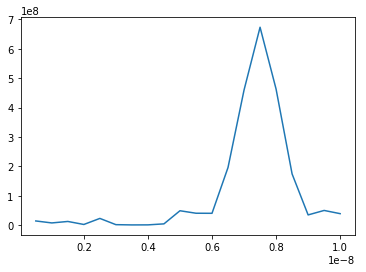

In [7]:
plt.plot(d, infer)

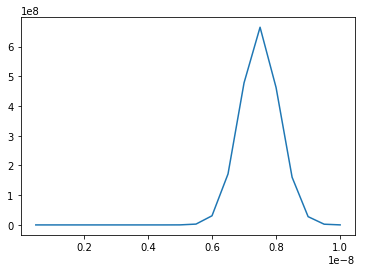

In [8]:
plt.plot(d, f)

In [9]:
beta_samples = dls.get_beta(chained_sampler, ndim)
beta_q = beta_samples.quantile([0.5], axis=0)
beta_q

,beta
0.5,0.943006


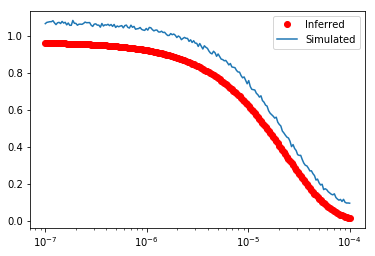

In [12]:
theta_infer = np.append(infer, 0.943)
infer_g2 = dls.g2(theta_infer, d, m, gamma, time)
plt.semilogx(time, infer_g2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='Simulated')
plt.legend()

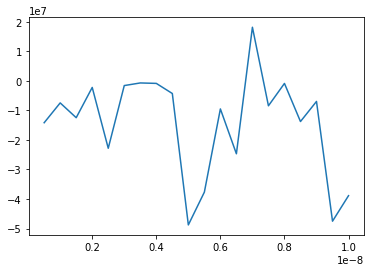

In [11]:
plt.plot(d, f - infer)

(array([1205., 1708., 2456., 2713., 2722., 2882., 2799., 1654., 1073.,
         788.]),
 array([0.00229857, 0.20187646, 0.40145436, 0.60103225, 0.80061014,
        1.00018804, 1.19976593, 1.39934383, 1.59892172, 1.79849961,
        1.99807751]),
 <a list of 10 Patch objects>)

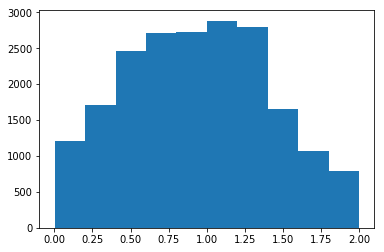

In [13]:
beta_posterior = beta_samples.values.flatten()
plt.hist(beta_posterior)